In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

In [ ]:
df = pd.read_csv('ai_job_market_insights.csv')
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Job_Title              500 non-null    object 
 1   Industry               500 non-null    object 
 2   Company_Size           500 non-null    object 
 3   Location               500 non-null    object 
 4   AI_Adoption_Level      500 non-null    object 
 5   Automation_Risk        500 non-null    object 
 6   Required_Skills        500 non-null    object 
 7   Salary_USD             500 non-null    float64
 8   Remote_Friendly        500 non-null    object 
 9   Job_Growth_Projection  500 non-null    object 
dtypes: float64(1), object(9)
memory usage: 39.2+ KB


,Salary_USD
count,500.000000
mean,91222.390974
std,20504.291453
min,31969.526346
25%,78511.514863
50%,91998.195286
75%,103971.282092
max,155209.821614


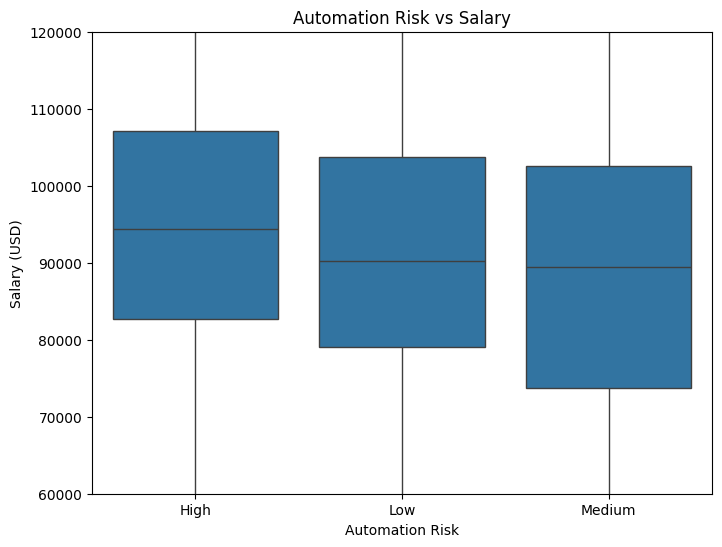

F-statistic: 4.076582873669864
P-value: 0.01753587595280028


In [ ]:
# 1. Relationship Between Automation_Risk and Salary
plt.figure(figsize=(8, 6))
sns.boxplot(x='Automation_Risk', y='Salary_USD', data=df)
plt.ylim(60000, 120000)  # Set Y-axis range.
plt.title('Automation Risk vs Salary')
plt.ylabel('Salary (USD)')
plt.xlabel('Automation Risk')
plt.show()

# Perform ANOVA test.
low_risk = df[df['Automation_Risk'] == 'Low']['Salary_USD']
medium_risk = df[df['Automation_Risk'] == 'Medium']['Salary_USD']
high_risk = df[df['Automation_Risk'] == 'High']['Salary_USD']

f_stat, p_value = f_oneway(low_risk, medium_risk, high_risk)
print("F-statistic:", f_stat)
print("P-value:", p_value)

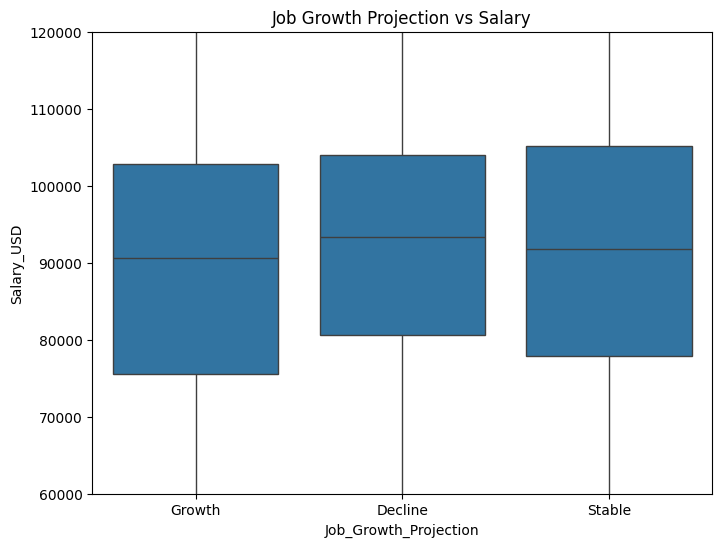

F-statistic: 0.4739365049287704
P-value: 0.6228278420043335


In [ ]:
# 2. Relationship Between Job_Growth_Projection and Salary
# Visualization
plt.figure(figsize=(8,6))
sns.boxplot(x='Job_Growth_Projection', y='Salary_USD', data=df)
plt.title('Job Growth Projection vs Salary')
plt.ylim(60000, 120000)
plt.show()

# Perform ANOVA test
decline = df[df['Job_Growth_Projection'] == 'Decline']['Salary_USD']
stable = df[df['Job_Growth_Projection'] == 'Stable']['Salary_USD']
growth = df[df['Job_Growth_Projection'] == 'Growth']['Salary_USD']

f_stat, p_value = f_oneway(decline, stable, growth)
print("F-statistic:", f_stat)
print("P-value:", p_value)


In [ ]:
# 3. Relationship Between Required Skills (Required_Skills) and Salary for Target Job Titles
# 1. Filter data for specific job titles.
target_titles = ['Product Manager', 'UX Designer', 'Operations Manager', 'HR Manager', 'Data Scientist']
filtered_df = df[df['Job_Title'].isin(target_titles)]

# 2. Data processing - Extract skills and convert them into binary variables.
skills = ['Python', 'Machine Learning', 'UX/UI Design', 'Project Management',
          'Data Analysis', 'JavaScript', 'Cybersecurity', 'Marketing', 'Sales', 'Communication']

# Create binary columns for each skill.
for skill in skills:
    filtered_df[skill] = filtered_df['Required_Skills'].apply(lambda x: 1 if skill in x else 0)

# 3. Salary analysis - Analyze the relationship between skills and salary
results = []
for skill in skills:
    skill_salary = filtered_df[filtered_df[skill] == 1]['Salary_USD']
    non_skill_salary = filtered_df[filtered_df[skill] == 0]['Salary_USD']

    # T-test
    t_stat, p_value = ttest_ind(skill_salary, non_skill_salary, nan_policy='omit')

    # Store results
    results.append({
        'Skill': skill,
        'Average Salary (Has Skill)': skill_salary.mean(),
        'Average Salary (No Skill)': non_skill_salary.mean(),
        'T-statistic': t_stat,
        'P-value': p_value
    })

# Convert results into a DataFrame for better display
results_df = pd.DataFrame(results)

# 4. Display results
print("Result：")
print(results_df.sort_values(by='P-value'))  # Sort by P-value to display skills with the highest significance


Result：
                Skill  Average Salary (Has Skill)  Average Salary (No Skill)  \
4       Data Analysis                83245.916782               92397.807570   
0              Python                97351.500830               90854.597539   
1    Machine Learning                95768.893582               90999.539406   
2        UX/UI Design                96059.288082               91050.697649   
5          JavaScript                95681.580398               91150.421326   
6       Cybersecurity                88680.731395               91919.342554   
3  Project Management                89298.214201               91930.556052   
7           Marketing                88719.581443               91791.838930   
8               Sales                89133.236668               91788.774478   
9       Communication                91747.686077               91525.959924   

   T-statistic   P-value  
4    -1.958814  0.051229  
0     1.460491  0.145391  
1     1.104304  0.270506  
2  

<ipython-input-35-c4c113fc899b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[skill] = filtered_df['Required_Skills'].apply(lambda x: 1 if skill in x else 0)
<ipython-input-35-c4c113fc899b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[skill] = filtered_df['Required_Skills'].apply(lambda x: 1 if skill in x else 0)
<ipython-input-35-c4c113fc899b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

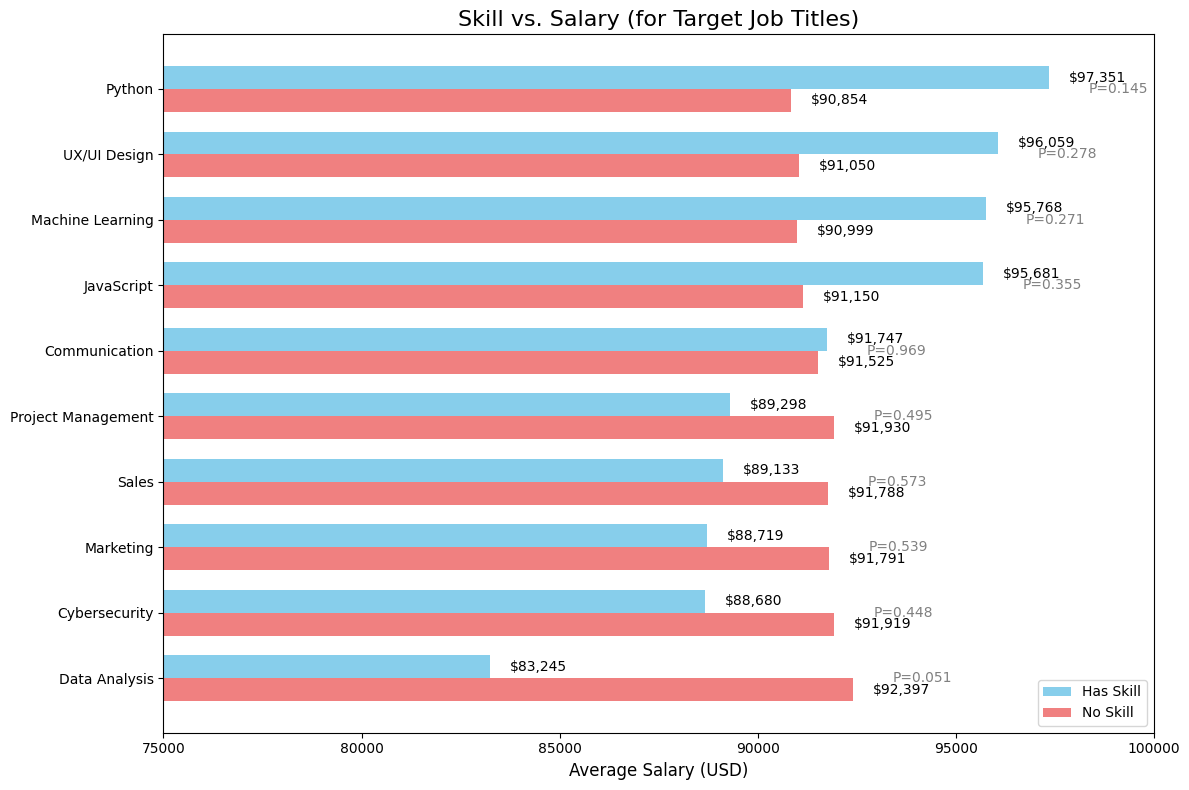

In [ ]:
# 4. Visualize the Relationship Between Required Skills (Required_Skills) and Salary for Target Job Titles
# Sort by 'Average Salary (Has Skill)'
sorted_results_df = results_df.sort_values(by='Average Salary (Has Skill)', ascending=False)

# Take the sorted data.
skills = sorted_results_df['Skill']
avg_salary_has_skill = sorted_results_df['Average Salary (Has Skill)']
avg_salary_no_skill = sorted_results_df['Average Salary (No Skill)']
p_values = sorted_results_df['P-value']

# Create a chart
x = np.arange(len(skills))  # Number of skills
width = 0.35  # Bar width

fig, ax = plt.subplots(figsize=(12, 8))

# Plot salary bar charts for those with and without the skill
bar1 = ax.barh(x - width/2, avg_salary_has_skill, width, label='Has Skill', color='skyblue')
bar2 = ax.barh(x + width/2, avg_salary_no_skill, width, label='No Skill', color='lightcoral')

# Add bar labels
for bars in [bar1, bar2]:
    for bar in bars:
        if 70000 <= bar.get_width() <= 100000:  # Show labels only within the x-range
            ax.text(
                bar.get_width() + 500,  # Offset for displaying labels
                bar.get_y() + bar.get_height() / 2,
                f"${int(bar.get_width()):,}",
                va='center', fontsize=10
            )

# Label significance (P-value)
for i, p_value in enumerate(p_values):
    ax.text(
        max(avg_salary_has_skill.iloc[i], avg_salary_no_skill.iloc[i]) + 1000,
        i,
        f"P={p_value:.3f}",
        fontsize=10,
        color="black" if p_value < 0.05 else "gray",
        va='center'
    )

# Adjust chart details
ax.set_yticks(x)
ax.set_yticklabels(skills)
ax.invert_yaxis()  # Ensure the highest-paying skills appear at the top
ax.set_xlabel('Average Salary (USD)', fontsize=12)
ax.set_title('Skill vs. Salary (for Target Job Titles)', fontsize=16)
ax.legend(loc='lower right')

# Set x-axis range
ax.set_xlim(75000, 100000)

plt.tight_layout()
plt.show()
